# Kapittel 18

Lengda av gradienten: 1.47585e+03
Lengda av gradienten: 1.83674e+02
Lengda av gradienten: 7.96149e+01
Lengda av gradienten: 7.64364e+01
Lengda av gradienten: 7.47990e+01
Lengda av gradienten: 7.32089e+01
Lengda av gradienten: 7.16494e+01
Lengda av gradienten: 7.01207e+01
Lengda av gradienten: 6.86230e+01
Lengda av gradienten: 6.71566e+01
Lengda av gradienten: 6.57217e+01
Lengda av gradienten: 6.43182e+01
Lengda av gradienten: 6.29463e+01
Lengda av gradienten: 6.16059e+01
Lengda av gradienten: 6.02970e+01
Lengda av gradienten: 5.90194e+01
Lengda av gradienten: 5.77730e+01
Lengda av gradienten: 5.65576e+01
Lengda av gradienten: 5.53729e+01
Lengda av gradienten: 5.42187e+01
Lengda av gradienten: 5.30948e+01
Lengda av gradienten: 5.20006e+01
Lengda av gradienten: 5.09360e+01
Lengda av gradienten: 4.99005e+01
Lengda av gradienten: 4.88937e+01
Lengda av gradienten: 4.79152e+01
Lengda av gradienten: 4.69646e+01
Lengda av gradienten: 4.60414e+01
Lengda av gradienten: 4.51452e+01
Lengda av grad

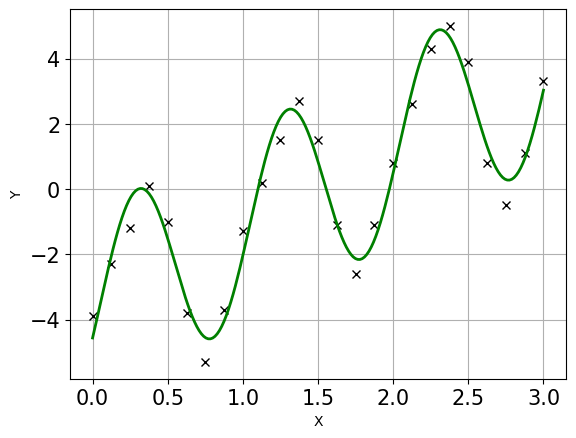

In [3]:
"""Dette skriptet optimerar parametrane for ein modelle for eit gitt data-sett. 
Modellen er ein kombinasjon av ein trigonometrisk og ein lineær funksjon.

Parametrane i modellen blir bestemt ved først å minimere summen av kvadrata av 
feilen og så minimere denne ved hjelp av gradient-metoden.

Alle inputs, inkludert sjølve data-settet, er hardkoda i starten av skriptet.
"""

# Importerer bibliotek
import numpy as np
from matplotlib import pyplot as plt

# Datasett
y_data = [-3.9, -2.3, -1.2, 0.1, -1, -3.8, -5.3, -3.7, 
          -1.3, 0.2, 1.5, 2.7, 1.5, -1.1, -2.6, -1.1, 
          0.8, 2.6, 4.3, 5.0, 3.9, 0.8, -0.5, 1.1, 3.3]
num_pkt = len(y_data)                   # Antal punkt
x_data = np.linspace(0, 3, num_pkt)     # x-verdiar

# Parametrar for gradient-metoden
h = 1e-3            # For endeleg-differnase estimat
gamma = 1e-4        # Læringsraten
grad_min = 1e-4     # Stopp-kriterium for gradienten
it_count_max = 1e5  # Avgrensing på antal iterasjonar

# Startpunkt for parametrane
a = 4
b = 6
c = 0.4
d = 3
e = -5

# Modell vi vil tilpasse til data
def f(x, a, b, c, d, e):
    return a*np.cos(b*(x - c)) + d*x + e

# Funksjonen vi skal minimere - summen av kvadrata av 
# feilen for kvart punkt
def S(a, b, c, d, e):
    S = 0
    for indeks in range(0, num_pkt):
        S = S + (y_data[indeks] - 
            f(x_data[indeks], a, b, c, d, e))**2
    return S

# Initere grad_lengde og it_count - for aa komme i gong
grad_lengde = 1e2
it_count = 0

# Gradient-metoden
while grad_lengde > grad_min and it_count < it_count_max:
    # Estimerer gradienten - ved midspunktsmetoden
    dSda = (S(a+h, b, c, d, e) - S(a-h, b, c, d, e))/(2*h)
    dSdb = (S(a, b+h, c, d, e) - S(a, b-h, c, d, e))/(2*h)
    dSdc = (S(a, b, c+h, d, e) - S(a, b, c-h, d, e))/(2*h)
    dSdd = (S(a, b, c, d+h, e) - S(a, b, c, d-h, e))/(2*h)
    dSde = (S(a, b, c, d, e+h) - S(a, b, c, d, e-h))/(2*h)
    
    # Lengda av gradienten
    grad_lengde = np.sqrt(dSda**2 + dSdb**2 + dSdc**2 + 
                          dSdd**2 + dSde**2)
    # Skriv grad_lengde til skjerm - for å 
    # følge framdrifta
    print(f'Lengda av gradienten: {grad_lengde:.5e}')
    
    # Oppdaterer parametrane
    a = a - gamma*dSda
    b = b - gamma*dSdb
    c = c - gamma*dSdc
    d = d - gamma*dSdd    
    e = e - gamma*dSde
    
    # Tel antal iterasjonar
    it_count = it_count + 1

if it_count == it_count_max:
    print('Dette ser ikkje ut til å konvergere')
else:
    # Skriv optimale parametrar til skjerm
    print('Optimale parametrar:')
    print(f'a = {a:.2f}')
    print(f'b = {b:.2f}')
    print(f'c = {c:.2f}')
    print(f'd = {d:.2f}')
    print(f'e = {e:.2f}')
    # Skriv minimal(?) funksjonsverdi til skjerm:
    S_min = S(a, b, c, d, e)
    print(f'Minimalverdi for S: {S_min:.2e}')
        
    # Plottar punkta og modellen med tilpassa parametrar
    # x- og y-verdiar for plotting av modell
    xx = np.linspace(x_data[0], x_data[-1], 200)
    yy = f(xx, a, b, c, d, e)
    # Datapunkta
    plt.plot(x_data, y_data, 'kx')
    # Modellen
    plt.plot(xx, yy, 'g-', linewidth = 2)
    # Tekst og rutenett
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(visible=True)
    plt.show()